# <center>Web scraping and data visualization</center>


Our aim is to retrieve the top 10 highest grossing movies with their total gross and visualise it using bar graph and pie chart

### Import necessary packages

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import requests

### Scrape the required data from Box Office Mojo

In [169]:
url = 'https://www.boxofficemojo.com/alltime/world/'
html = requests.get(url)
print(html)

<Response [200]>


Parse the html into Beautiful Soup format

Prettify method will convert the Beautiful Soup parsed object into a nicely formatted Unicode string

In [158]:
page = bs(html.text,'html.parser')
res = page.prettify()
print(res[:1000]) 

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="en">
 <head>
  <title>
   All Time Worldwide Box Office Grosses
  </title>
  <meta content="worldwide" name="all time box office"/>
  <meta content="world, worldwide, wide, box, office, foriegn, overseas, domestic, all, time, report, movie, film" name="keywords"/>
  <meta content="Chart of all time worldwide box office grosses, combining domestic and foreign grosses." name="description"/>
  <link charset="utf-8" href="/css/mojo.css?1" media="screen" rel="stylesheet" title="no title" type="text/css"/>
  <link charset="utf-8" href="/css/mojo.css?1" media="print" rel="stylesheet" title="no title" type="text/css"/>
 </head>
 <body>
  <iframe frameborder="0" height="1" id="sis_pixel_sitewide" marginheight="0" marginwidth="0" style="display: none;" width="1">
  </iframe>
  <script>
   setTimeout(function(){
        try{
            //sis3.0 pixel
            var cacheBust = Math

The above code prints the first 1000 characters. It shows the usage of prettify method.

Next find the top 10 movies of all time

In [ ]:
page.findAll('b')

The above code will return all the bold tags. We can remove all the irrelevant information using Slice function. After the slice 
operation, only the required information will be available.

In [162]:
info = page.findAll('b')[3:23]
print(info)

[<b>Avatar</b>, <b>$2,788.0</b>, <b>Avengers: Endgame</b>, <b>$2,782.0</b>, <b>Titanic</b>, <b>$2,187.5</b>, <b>Star Wars: The Force Awakens</b>, <b>$2,068.2</b>, <b>Avengers: Infinity War</b>, <b>$2,048.4</b>, <b>Jurassic World</b>, <b>$1,671.7</b>, <b>Marvel's The Avengers</b>, <b>$1,518.8</b>, <b>Furious 7</b>, <b>$1,516.0</b>, <b>Avengers: Age of Ultron</b>, <b>$1,405.4</b>, <b>Black Panther</b>, <b>$1,346.9</b>]


The top 10 movies along with their global gross is retrieved using the above code. Now we need to map each gross with its respective 
movie.Before that we should remove the bold tags.

## Process the

In [160]:
movie = []
gross = []
for item in info[::2]:
    movie.append(str(item).replace("</b>","").replace("<b>",""))
for item in info[1::2]:
    gross.append(float(str(item).replace("</b>","").replace("<b>","").replace("$","").replace(",","")))

Now we have the required data with us. Lets visualise it using a bar graph

   ## Bar Graph

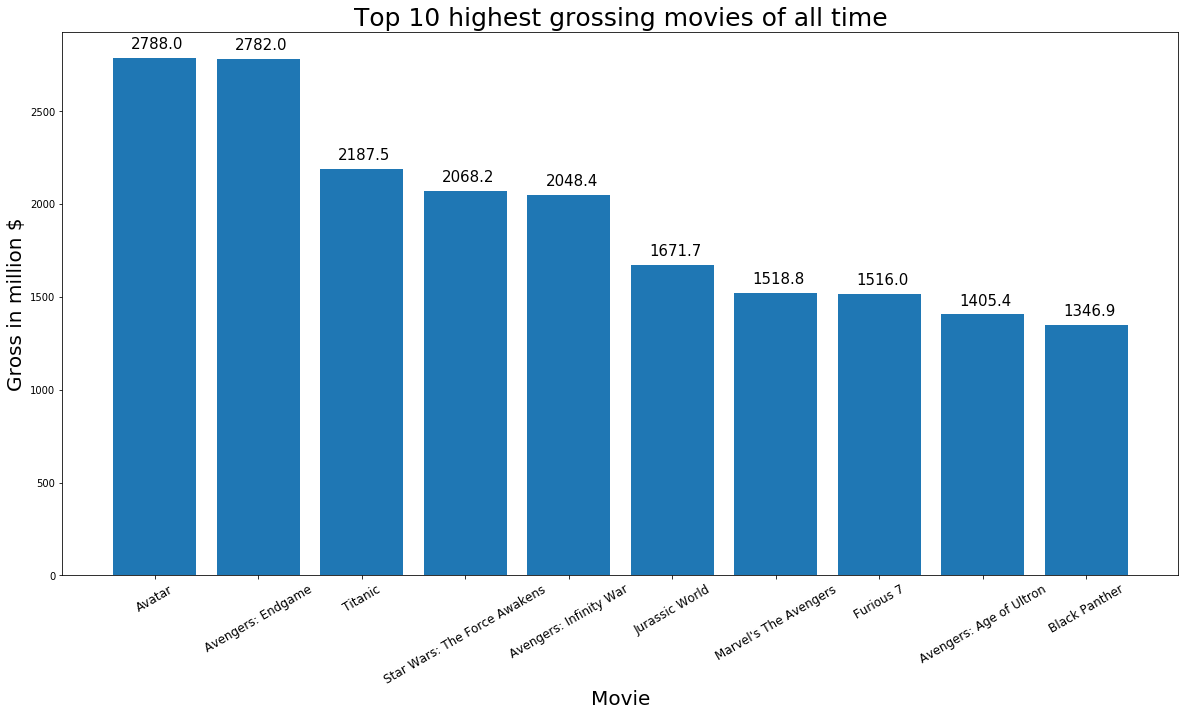

In [121]:
index = np.arange(len(movie))
plt.figure(figsize=(20,10))
plt.bar(index,gross)
plt.xlabel('Movie', fontsize=20)
plt.ylabel('Gross in million $', fontsize=20)
plt.xticks(index, movie, fontsize=12, rotation=30)
for i, v in enumerate(gross):
    plt.text(i - 0.225, v + 50 , str(v), color='black',size = 15)
plt.title('Top 10 highest grossing movies of all time',fontsize = 25)
plt.show()


Now lets create a pie chart based on this data.

## Pie Chart

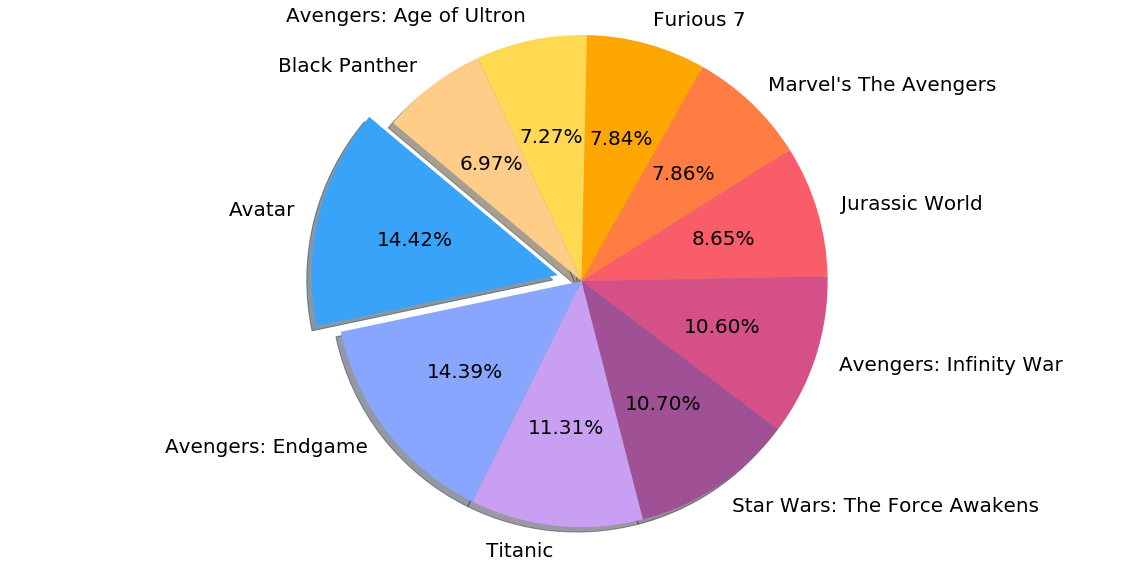

In [171]:
colors = ['#39a3fa','#89a6fe','#c99ff3','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600','#ffd952','#ffcd87']
e = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  
plt.rcParams['font.size'] = 20
plt.figure(figsize=(20,10))
plt.pie(gross,explode = e, labels=movie, colors=colors,autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

The colors for the above pie chart were selected from a colour picker.

The chart shows the proportion of the gross of each movie to the total gross of the movies.

This means Avatar has contributed 14.42% of the total gross of all the movies. 

(The figures may change from time to time as it is updated regularly)